In [10]:
import os
import torch
import cv2

from src.resnet_yolo import resnet50
from src.config import VOC_CLASSES, COLORS
from yolo_loss import YoloLoss
from src.predict import predict_image

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialization

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# This is already provided in this repo, enjoy! It can even be ran on a CPU as it is already trained
load_network_path = 'checkpoints/best_detector.pth'
pretrained = True

print('Loading saved network from {}'.format(load_network_path))
net = resnet50().to(device)
net.load_state_dict(torch.load(load_network_path, map_location=device))

Loading saved network from checkpoints/best_detector.pth


<All keys matched successfully>

# Predict your own images!
By putting them in the data/some_images directory

predicting...


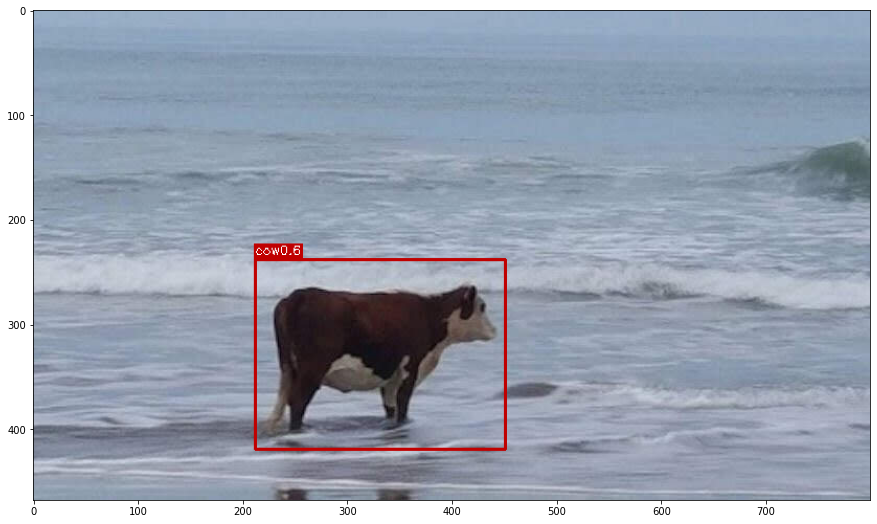

In [15]:
net.eval()

# select random image from test set
image_name = "cow.jpg"
file_root_test = 'data/some_images/'
image = cv2.imread(os.path.join(file_root_test, image_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
lower_confidence_limit = 0.45

print('predicting...')
result = predict_image(net, image_name, device, root_img_directory=file_root_test)
for left_up, right_bottom, class_name, _, prob in result:
    if prob <= 0.45: continue
    color = COLORS[VOC_CLASSES.index(class_name)]
    cv2.rectangle(image, left_up, right_bottom, color, 2)
    label = class_name + str(round(prob, 2))
    text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    p1 = (left_up[0], left_up[1] - text_size[1])
    cv2.rectangle(image, (p1[0] - 2 // 2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]),
                  color, -1)
    cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1, 8)

plt.figure(figsize = (15,15))
plt.imshow(image)